In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMPORTS**

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import os

In [22]:
# Model and Data parameters
num_class= 65
batch_size= 64
image_width= 64
image_height= 64
seed= 42

# Rescaling and Testing Splitting
training_datagen= ImageDataGenerator(rescale=1./255, validation_split= 0.2)

training_dir= '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train'
#testing_dir= '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test'

# Set as Training data
training_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size= (image_width, image_height),
    batch_size= batch_size,
    seed=seed,
    color_mode='grayscale',
    class_mode= 'categorical',
    subset= 'training')

labels_dict = {class_name: label for label, class_name in training_generator.class_indices.items()}
print(labels_dict)

Found 34064 images belonging to 65 classes.
{0: '0', 1: '1', 2: '10', 3: '11', 4: '12', 5: '13', 6: '14', 7: '15', 8: '16', 9: '17', 10: '18', 11: '19', 12: '2', 13: '20', 14: '21', 15: '22', 16: '23', 17: '24', 18: '25', 19: '26', 20: '27', 21: '28', 22: '29', 23: '3', 24: '30', 25: '31', 26: '32', 27: '33', 28: '34', 29: '35', 30: '36', 31: '37', 32: '38', 33: '39', 34: '4', 35: '40', 36: '41', 37: '42', 38: '43', 39: '44', 40: '45', 41: '46', 42: '47', 43: '48', 44: '49', 45: '5', 46: '50', 47: '51', 48: '52', 49: '53', 50: '54', 51: '55', 52: '56', 53: '57', 54: '58', 55: '59', 56: '6', 57: '60', 58: '61', 59: '62', 60: '63', 61: '64', 62: '7', 63: '8', 64: '9'}


In [23]:
# Set as validation data
validation_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(image_width, image_height),
    batch_size= batch_size,
    seed=seed,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation')

Found 8495 images belonging to 65 classes.


In [24]:
train_images = tf.keras.utils.image_dataset_from_directory(
     training_dir,
     color_mode="grayscale",
     label_mode="categorical",
     shuffle=True,
     seed=seed,
     image_size=(image_width,image_height),
     batch_size=batch_size)

Found 42559 files belonging to 65 classes.


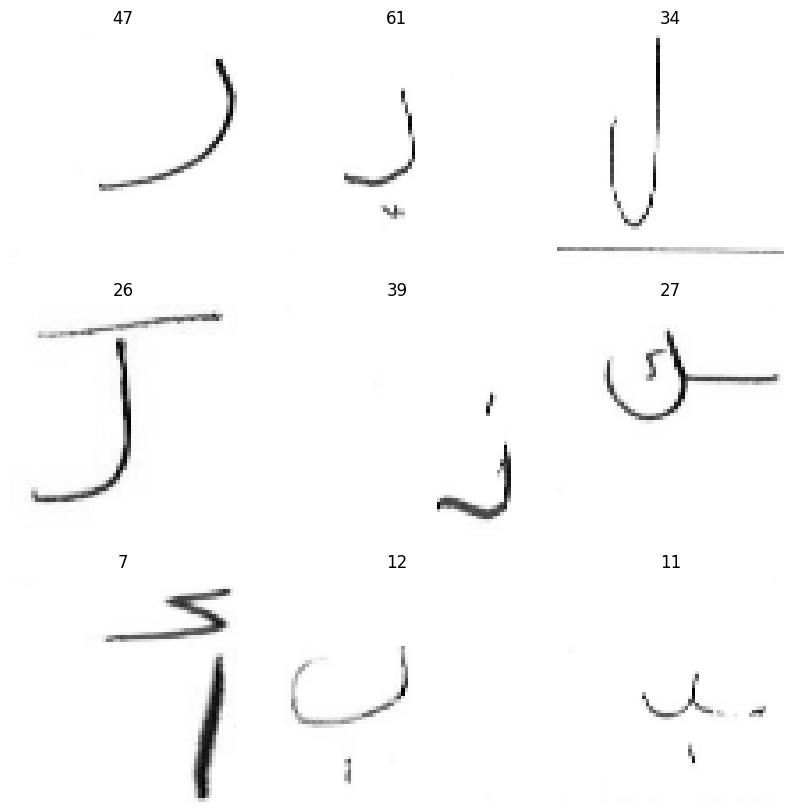

In [26]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
        plt.axis("off")

In [ ]:
label_names = [i for i in range(num_class)]

**BUILDING CNN MODEL**

In [28]:
model = Sequential([
    # Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
    Conv2D(32, (3, 3), activation='relu'),  # Adjust input shape as needed
    MaxPooling2D(2, 2),
    # Add more convolutional layers as needed
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Flatten the output to feed into a DNN
    Flatten(),
    # Dense (fully connected) layers
    Dense(128, activation='relu'),
    # Output layer with one neuron per class (adjust number of classes)
    Dense(training_generator.num_classes, activation='softmax')  # Assuming 28 classes for Arabic letters
])

In [17]:
model.build(input_shape=(None,image_width, image_height, 1))
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
epochs = 15
history = model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples
)

Epoch 1/15
532/532 [==============================] - 118s 219ms/step - loss: 3.2486 - accuracy: 0.1900 - val_loss: 2.1510 - val_accuracy: 0.4098
Epoch 2/15
532/532 [==============================] - 95s 178ms/step - loss: 1.7263 - accuracy: 0.5104
Epoch 3/15
532/532 [==============================] - 95s 178ms/step - loss: 1.1851 - accuracy: 0.6507
Epoch 4/15
532/532 [==============================] - 94s 176ms/step - loss: 0.8818 - accuracy: 0.7368
Epoch 5/15
532/532 [==============================] - 95s 178ms/step - loss: 0.6732 - accuracy: 0.7946
Epoch 6/15
532/532 [==============================] - 97s 182ms/step - loss: 0.5213 - accuracy: 0.8387
Epoch 7/15
532/532 [==============================] - 96s 180ms/step - loss: 0.3939 - accuracy: 0.8788
Epoch 8/15
532/532 [==============================] - 96s 180ms/step - loss: 0.3081 - accuracy: 0.9051
Epoch 9/15
532/532 [==============================] - 96s 180ms/step - loss: 0.2324 - accuracy: 0.9293
Epoch 10/15
532/532 [=========

In [31]:
test_loss, test_acc = model.evaluate(training_generator, verbose=2)
print('\nTest accuracy:', test_acc)

533/533 - 56s - loss: 0.0583 - accuracy: 0.9827 - 56s/epoch - 105ms/step

Test accuracy: 0.9827089905738831


In [32]:
# (Batch Size, Width, Height, 1 Image Tensor Channel (Greyscale))
# (Batch Size, Number of Classes)
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(64, 64, 64, 1)
(64, 65)


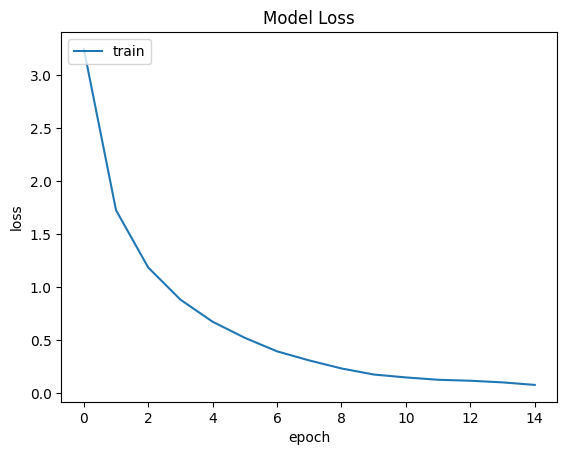

In [66]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

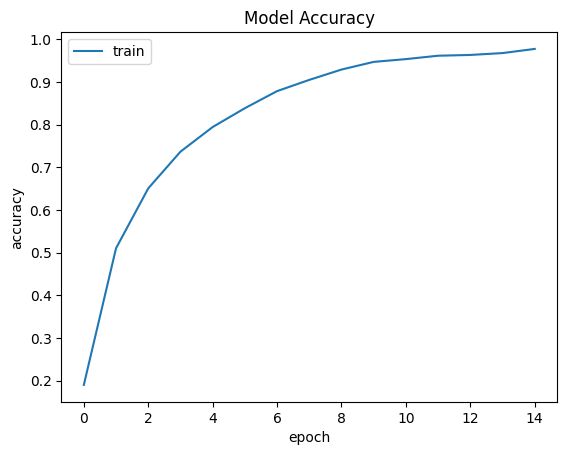

In [67]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

**TESTING**

In [34]:
testing_dir= '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test'

In [35]:
test_images = tf.keras.utils.image_dataset_from_directory(
        testing_dir,
        labels=None,
        label_mode="categorical",
        color_mode='grayscale',
        shuffle=False,
        image_size=(image_width,image_height),
        batch_size=batch_size)

Found 10640 files belonging to 1 classes.


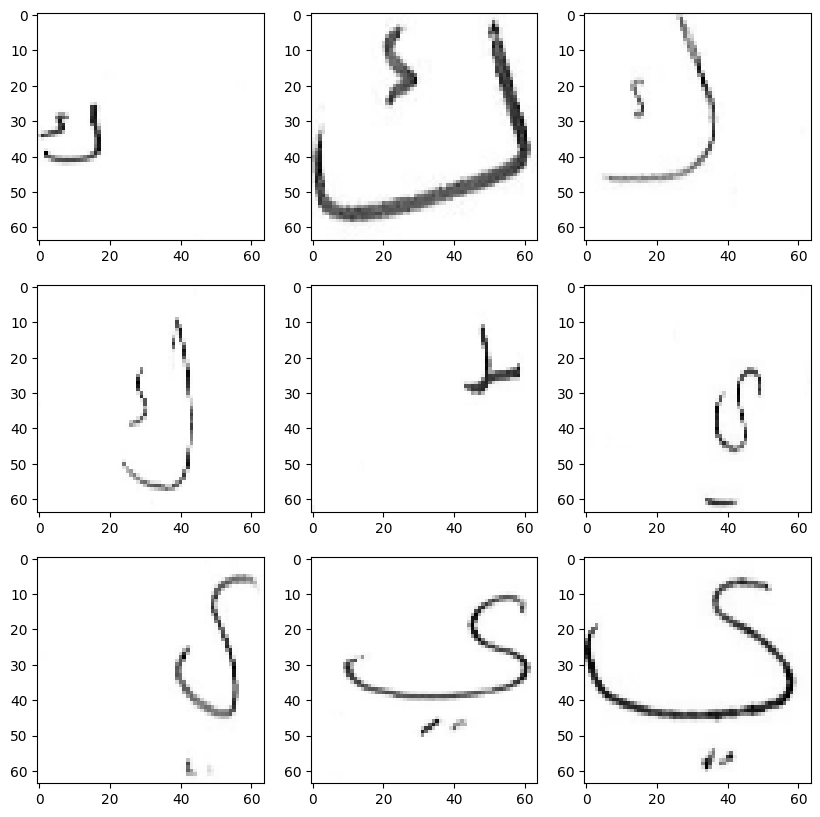

In [36]:
plt.figure(figsize=(10, 10))
for images in test_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)

In [37]:
for images in test_images:
    print(images.shape)
    break

(64, 64, 64, 1)


In [38]:
predictions = model.predict(test_images)

167/167 [==============================] - 13s 77ms/step


In [43]:
img_list = os.listdir(testing_dir)

In [44]:
labels_list = sorted(os.listdir(training_dir))
print(labels_list)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [45]:
predictions[1][22]

0.99999994

**PREDICTIONS CSV:**

In [46]:
predictions.shape

(10640, 65)

In [48]:
df_predictions = pd.DataFrame(columns=['ID','Label']) #dtype=(np.int32,np.int32)

predictions_mod = np.argmax(predictions, 1)

for idx,image in enumerate(sorted(img_list)):
    #print(image, predictions_mod[idx])
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(labels_list[predictions_mod[idx]])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])

In [50]:
print(predictions_mod)

[36 22 22 ... 61 22 36]


In [51]:
df_predictions.head()

,ID,Label
0,0,41
0,1,29
0,10,29
0,100,29
0,1000,1


In [53]:
df_predictions.sort_values(by='ID', inplace=True)

In [54]:
df_predictions.reset_index(drop=True)

,ID,Label
0,0,41
1,1,29
2,2,29
3,3,29
4,4,12
...,...,...
10635,10635,10
10636,10636,61
10637,10637,61
10638,10638,61


In [68]:
df_predictions.to_csv('predictions.csv', index=False, header=True) 